## 최소 신장 트리의 이해

### 1. <span style="background-color:#fff5b1">프림 알고리즘 (Prim's algorithm)</span>
- 대표적인 최소 신장 트리 알고리즘
  - Kruskal’s algorithm (크루스칼 알고리즘), Prim's algorithm (프림 알고리즘)
- 프림 알고리즘 
  - 시작 정점을 선택한 후, 정점에 인접한 간선중 최소 간선으로 연결된 정점을 선택하고, 해당 정점에서 다시 최소 간선으로 연결된 정점을 선택하는 방식으로 최소 신장 트리를 확장해가는 방식
- Kruskal's algorithm 과 Prim's algorithm 비교
  - 둘다, <span style="background-color:#fff5b1">탐욕 알고리즘</span>을 기초로 하고 있음 (당장 눈 앞의 최소 비용을 선택해서, 결과적으로 최적의 솔루션을 찾음)
  - <font color = "blue">Kruskal's algorithm은 가장 가중치가 작은 간선부터 선택</font>하면서 MST를 구함
  - <span style="background-color:#fff5b1">Prim's algorithm</span>은 <span style="background-color:#fff5b1">특정 정점에서 시작, 해당 정점에 연결된 가장 가중치가 작은 간선을 선택</span>, 간선으로 연결된 정점들에 연결된 간선 중에서 가장 가중치가 작은 간선을 택하는 방식으로 MST를 구함

### 2. 그림으로 이해하는 프림 알고리즘
1. 임의의 정점을 선택, '연결된 노드 집합'에 삽입
2. 선택된 정점에 연결된 간선들을 간선 리스트에 삽입
3. 간선 리스트에서 최소 가중치를 가지는 간선부터 추출해서,
   - 해당 간선에 연결된 인접 정점이 '연결된 노드 집합'에 이미 들어 있다면, 스킵함(cycle 발생을 막기 위함)
   - 해당 간선에 연결된 인접 정점이 '연결된 노드 집합'에 들어 있지 않으면, 해당 간선을 선택하고, 해당 간선 정보를 '최소 신장 트리'에 삽입
4. 추출한 간선은 간선 리스트에서 제거
5. 간선 리스트에 더 이상의 간선이 없을 때까지 3-4번을 반복

<img src="https://www.fun-coding.org/00_Images/prim1.png" width=800>

<img src="https://www.fun-coding.org/00_Images/prim2.png" width=800>

<img src="https://www.fun-coding.org/00_Images/prim3.png" width=800>

### 3. 프림 알고리즘 (Prim's algorithm) 코드 작성

### 참고: heapq 라이브러리 활용을 통해 우선순위 큐 사용하기
- heapq.heappush를 통해 데이터를 heap 형태로 넣을 수 있음 (0번 인덱스를 우선순위로 인지함)

In [2]:
import heapq

queue = []
graph_data = [[2, 'A'], [5, 'B'], [3, 'C']]

for edge in graph_data:
    heapq.heappush(queue, edge)
    
for index in range(len(queue)):
    print (heapq.heappop(queue))

print (queue)

[2, 'A']
[3, 'C']
[5, 'B']
[]


- heapq.heapify() 함수를 통해 리스트 데이터를 heap 형태로 한 번에 변환할 수 있음 (0번 인덱스를 우선순위로 인지함)

In [4]:
import heapq

graph_data = [[2, 'A'], [5, 'B'], [3, 'C']]

heapq.heapify(graph_data)
    
for index in range(len(graph_data)):
    print (heapq.heappop(graph_data))

print (graph_data)

[2, 'A']
[3, 'C']
[5, 'B']
[]


### 참고: collections 라이브러리의 defaultdict 함수 활용하기
- defaultdict 함수를 사용해서, key에 대한 value를 지정하지 않았을 시, 빈 리스트로 초기화하기

In [14]:
from collections import defaultdict

list_dict = defaultdict(list) # defaultdict() : 초기화 된 값이 없을 경우에 반환할 초기값의 데이터타입을, 괄호안에 넣어서 설정
print (list_dict['key1'])

[]


### 프림 알고리즘 파이썬 코드
0. 모든 간선 정보를 저장 (**adjacent_edges**)
1. 임의의 정점을 선택, '연결된 노드 집합(**connected_nodes**)'에 삽입
2. 선택된 정점에 연결된 간선들을 간선 리스트(**candidate_edge_list**)에 삽입
3. 간선 리스트(**candidate_edge_list**)에서 최소 가중치를 가지는 간선부터 추출해서,
   - 해당 간선에 연결된 인접 정점이 '연결된 노드 집합'에 이미 들어 있다면, 스킵함(cycle 발생을 막기 위함)
   - 해당 간선에 연결된 인접 정점이 '연결된 노드 집합'에 들어 있지 않으면, 해당 간선을 선택하고, 해당 간선 정보를 '최소 신장 트리(**mst**)'에 삽입
     - 해당 간선에 연결된 인접 정점의 간선들 중, '연결된 노드 집합(**connected_nodes**)' 에 없는 노드와 연결된 간선들만 간선 리스트(**candidate_edge_list**) 에 삽입 
       - '연결된 노드 집합(**connected_nodes**)' 에 있는 노드와 연결된 간선들을 간선 리스트에 삽입해도, 해당 간선은 스킵될 것이기 때문임
       - 어차피 스킵될 간선을 간선 리스트(**candidate_edge_list**)에 넣지 않으므로 해서, 간선 리스트(**candidate_edge_list**)에서 최소 가중치를 가지는 간선부터 추출하기 위한 자료구조 유지를 위한 effort를 줄일 수 있음 (예, 최소힙 구조 사용)
     
     
4. 선택된 간선은 간선 리스트에서 제거
5. 간선 리스트에 더 이상의 간선이 없을 때까지 3-4번을 반복

In [18]:
myedges = [
    (7, 'A', 'B'), (5, 'A', 'D'),
    (8, 'B', 'C'), (9, 'B', 'D'), (7, 'B', 'E'),
    (5, 'C', 'E'),
    (7, 'D', 'E'), (6, 'D', 'F'),
    (8, 'E', 'F'), (9, 'E', 'G'),
    (11, 'F', 'G')
]

In [21]:
from collections import defaultdict
from heapq import *

def prim(start_node, edges):
    mst = list()
    adjacent_edges = defaultdict(list)
    for weight, n1, n2 in edges:
        adjacent_edges[n1].append((weight, n1, n2))
        adjacent_edges[n2].append((weight, n2, n1))

    connected_nodes = set(start_node)
    candidate_edge_list = adjacent_edges[start_node]
    heapify(candidate_edge_list)
    
    while candidate_edge_list:
        weight, n1, n2 = heappop(candidate_edge_list)
        if n2 not in connected_nodes:
            connected_nodes.add(n2)
            mst.append((weight, n1, n2))
            
            for edge in adjacent_edges[n2]:
                if edge[2] not in connected_nodes:
                    heappush(candidate_edge_list, edge)

    return mst

In [22]:
prim ('A', myedges)

[(5, 'A', 'D'),
 (6, 'D', 'F'),
 (7, 'A', 'B'),
 (7, 'B', 'E'),
 (5, 'E', 'C'),
 (9, 'E', 'G')]

### 4. 시간 복잡도
  - 최악의 경우, while 구문에서 <font color = "blue">모든 간선에 대해 반복하고(E)</font>, 그때마다 모든 간선에 따른 <font color = "blue">최소 힙 구조를 사용(logE)</font>하므로 <span style="background-color:#fff5b1">$O(ElogE)$</span> 시간 복잡도를 가짐
      - 첫번째 반복문, for 문의 시간복잡도 : O(E)
      - 두번째 반복문, while 문의 시간복잡도 : O(ElogE)
      - ⇒ O(E) + O(ElogE) 인데, 시간복잡도가 더 큰 것이 유의미하기 때문에 $O(ElogE)$

### 참고: <span style="background-color:#fff5b1">개선된 프림 알고리즘</span>
- 간선이 아닌 <span style="background-color:#fff5b1">노드를 중심</span>으로 우선순위 큐를 적용하는 방식
  - 초기화 - 정점:key 구조를 만들어놓고, 특정 정점의 key값은 0, 이외의 정점들의 key값은 무한대로 놓음.  모든 정점:key 값은 우선순위 큐에 넣음
  - 가장 key값이 적은 정점:key를 추출한 후(pop 하므로 해당 정점:key 정보는 우선순위 큐에서 삭제됨), (extract min 로직이라고 부름)
  - 해당 정점의 인접한 정점들에 대해 key 값과 연결된 가중치 값을 비교하여 key값이 작으면 해당 정점:key 값을 갱신
    - 정점:key 값 갱신시, 우선순위 큐는 최소 key값을 가지는 정점:key 를 루트노드로 올려놓도록 재구성함 (decrease key 로직이라고 부름)

- 개선된 프림 알고리즘 구현시 고려 사항
  - 우선순위 큐(최소힙) 구조에서, 이미 들어가 있는 데이터의 값 변경시, 최소값을 가지는 데이터를 루트노드로 올려놓도록 재구성하는 기능이 필요함
  - 구현 복잡도를 줄이기 위해, heapdict 라이브러리를 통해, 해당 기능을 간단히 구현

In [25]:
from heapdict import heapdict

def prim(graph, start):
    mst, keys, pi, total_weight = list(), heapdict(), dict(), 0
    for node in graph.keys():
        keys[node] = float('inf')
        pi[node] = None
    keys[start], pi[start] = 0, start

    while keys:
        current_node, current_key = keys.popitem()
        mst.append([pi[current_node], current_node, current_key])
        total_weight += current_key
        for adjacent, weight in graph[current_node].items():
            if adjacent in keys and weight < keys[adjacent]:
                keys[adjacent] = weight
                pi[adjacent] = current_node
    return mst, total_weight

In [26]:
mygraph = {
    'A': {'B': 7, 'D': 5},
    'B': {'A': 7, 'D': 9, 'C': 8, 'E': 7},
    'C': {'B': 8, 'E': 5},
    'D': {'A': 5, 'B': 9, 'E': 7, 'F': 6},
    'E': {'B': 7, 'C': 5, 'D': 7, 'F': 8, 'G': 9},
    'F': {'D': 6, 'E': 8, 'G': 11},
    'G': {'E': 9, 'F': 11}    
}
mst, total_weight = prim(mygraph, 'A')
print ('MST:', mst)
print ('Total Weight:', total_weight)

MST: [['A', 'A', 0], ['A', 'D', 5], ['D', 'F', 6], ['A', 'B', 7], ['D', 'E', 7], ['E', 'C', 5], ['E', 'G', 9]]
Total Weight: 39


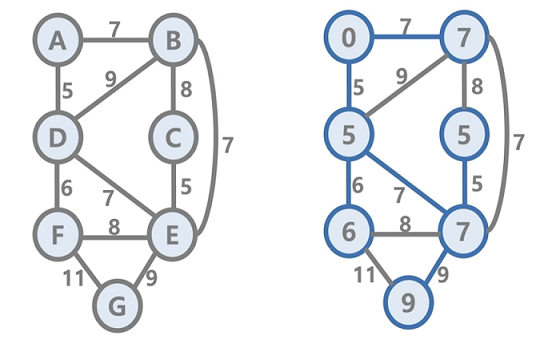

### 개선된 프림 알고리즘의 시간 복잡도: <span style="background-color:#fff5b1">$ O(ElogV) $</span>
- 최초 key 생성 시간 복잡도(첫번째 for 구문) : <font color = "blue">$ O(V) $</font>
<br><br>
- while 구문과 keys.popitem() 의 시간 복잡도는 <font color = "blue">$ O(VlogV) $</font>
  - while 구문은 V(노드 갯수) 번 실행됨: $O(V)$
  - heap 에서 최소 key 값을 가지는 노드 정보 추출 시(pop)의 시간 복잡도: $ O(logV) $
<br><br>
- for 구문의 총 시간 복잡도는 <font color = "blue">$ O(ElogV) $</font>
  - for 구문은 while 구문 반복시에 결과적으로 총 최대 간선의 수 E만큼 실행 가능 $ O(E) $
  - for 구문 안에서 key값 변경시마다 heap 구조를 변경해야 하며, heap 에는 최대 V 개의 정보가 있으므로 $ O(logV) $
    > 일반적인 heap 자료 구조 자체에는 본래 heap 내부의 데이터 우선순위 변경시, 최소 우선순위 데이터를 루트노드로 만들어주는 로직은 없음. 이를 decrease key 로직이라고 부름, 해당 로직은 heapdict 라이브러리를 활용해서 간단히 적용가능

- 따라서 총 시간 복잡도는 <font color = "blue">$ O(V + VlogV + ElogV) $</font> 이며,
  - $O(V)$는 전체 시간 복잡도에 큰 영향을 미치지 않으므로 삭제,
  - E > V 이므로 (최대 $ V^2 = E $ 가 될 수 있음), $ O((V + E)logV) $ 는 간단하게 <span style="background-color:#fff5b1">$ O(ElogV) $</span> 로 나타낼 수 있음